In [2]:
import pandas as pd
import os

import matplotlib.pyplot as plt
from dev_library import df_alignment


### Observations with children

In the later periods, there are no individuals with children. We first read in the original STATA file.

In [8]:
fname_data = "/home/peisenha/structExpectations/data-exchange-sciebo/soepcore_struct_prep.dta"
df_obs = df_alignment(pd.read_stata(fname_data, convert_categoricals=False))
df_obs.head()

Education_Level  Experience_Part_Time  Experience_Full_Time  \
Identifier Period                                                               
901        32                 Low                     2                    33   
           35                 Low                     2                    36   
           36                 Low                     2                    37   
           37                 Low                     2                    38   
           38                 Low                     2                    39   

                   Age_Youngest_Child  Number_of_Children  Partner_Indicator  \
Identifier Period                                                              
901        32                      -1                   0                  0   
           35                      -1                   0                  0   
           36                      -1                   0                  0   
           37                      -1                   0                  0   
           38                      -1                   0                  0   

                  Choice  Wage_Observed  
Identifier Period                        
901        32       Full      12.744263  
           35       Full      12.813683  
           36       Full      12.590151  
           37       Full      12.708170  
           38       Full      10.990616

Now I create an indicator variable for observation with children

In [18]:
df_obs["Child_present"] = (df_obs["Number_of_Children"] > 0)

We can then plot the share of individuals with children by period.

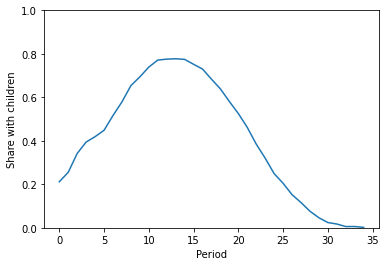

In [20]:
df_obs["Child_present"].groupby("Period").value_counts(normalize=True).loc[slice(None), True].plot(ylabel="Share with children", ylim=[0, 1]);

In [66]:
num_periods = df_sim.index.get_level_values("Period").max()

LABELS_EDUCATION = ["High", "Medium", "Low"]
LABELS_CHOICE = ["Home", "Part", "Full"]
LABELS_CHILD = [False, True]
    
def get_info(df_int):


    entries = [list(range(num_periods)), LABELS_EDUCATION, LABELS_CHILD, LABELS_CHOICE]
    conditioning = ["Period", "Education_Level", "Child_present", "Choice"]
    default_entry = 0

    index = pd.MultiIndex.from_product(entries, names=conditioning)
    grid = pd.DataFrame(data=default_entry, columns=["Value"], index=index)

    info = df_int.groupby(conditioning[:3]).Choice.value_counts(normalize=True)
    grid.update(info.rename("Value"))
    
    return grid

info_sim = get_info(df_sim)
info_obs = get_info(df_obs)

In [93]:
entries = [list(range(num_periods)), LABELS_EDUCATION, LABELS_CHILD, LABELS_CHOICE]
conditioning = ["Period", "Education_Level", "Child_present", "Choice"]
default_entry = 0

index = pd.MultiIndex.from_product(entries, names=conditioning)
grid = pd.DataFrame(data=default_entry, columns=["Value"], index=index)

info = df_obs.groupby(conditioning[:3]).Choice.value_counts()
grid.update(info.rename("Value"))

df_obs.groupby("Period")["Child_present"].value_counts()

Period  Child_present
0       False             8756
        True              1244
1       False             8570
        True              1430
2       False             8233
                         ...  
34      True                 3
35      False            10000
36      False            10000
37      False            10000
38      False            10000
Name: Child_present, Length: 74, dtype: int64

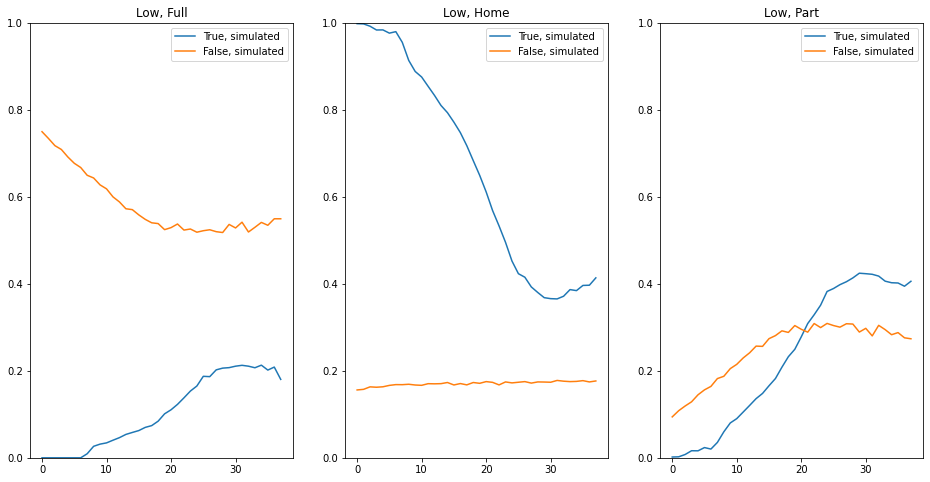

In [112]:
x_values = range(num_periods)

for edu_level in ["Low"]:
    
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))

    for ax, choice in [(ax1, "Full"), (ax2, "Home"), (ax3, "Part")]:        
        ax.set_prop_cycle(None)

        for child in [True, False]:
            y_sim = info_sim.loc[slice(None), edu_level, child, choice]
            ax.plot(x_values, y_sim, label=f"{child}, simulated")

            #y_obs = info_obs.loc[slice(None), edu_level, child, choice]
            #ax.plot(x_values, y_obs, label=f"{child}, observed", linestyle="--")

        
        ax.set_title(f"{edu_level}, {choice}")
        ax.set_ylim([0, 1])    
        ax.legend()